In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('food_coded.csv')
data.head(1)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


In [3]:
#running an independent ttest for gender and comfort food reasons
from scipy.stats import ttest_ind

In [5]:
#first dividing the test into two groups based on gender
males = data[data['Gender']==2]
females = data[data['Gender']==1]

In [8]:
#let's see if women are more or less likely to cook than males
ttest_ind(males['cook'], females['cook'], nan_policy='omit')

Ttest_indResult(statistic=3.5975447436482009, pvalue=0.00046771502982370411)

So, there is a statistical difference between men and women and their likelyhood to cook.

In [9]:
#let's see if there are differences in reasons for eating comfort food
ttest_ind(males['comfort_food_reasons_coded'], females['comfort_food_reasons_coded'], nan_policy='omit')

Ttest_indResult(statistic=1.7442863602296588, pvalue=0.084063628015864755)

Very close because p is 0.08 but it is not smaller than 0.05 so not quite statistically significant. 

In [10]:
#let's see if there are differences in current diet
ttest_ind(males['diet_current_coded'], females['diet_current_coded'], nan_policy='omit')

Ttest_indResult(statistic=1.6270761902040354, pvalue=0.10628005395467666)

No differences in current diet between men and women

In [11]:
#let's see if there are differences in eating changes
ttest_ind(males['eating_changes_coded'], females['eating_changes_coded'], nan_policy='omit')

Ttest_indResult(statistic=0.4186619756569524, pvalue=0.67619332454651726)

nothing here either.

In [12]:
#let's visualize the distribution of men who cook since this was significant
male_cook = males['cook'].value_counts()
print(male_cook)

3.0    15
4.0    12
2.0    11
5.0     7
1.0     3
Name: cook, dtype: int64


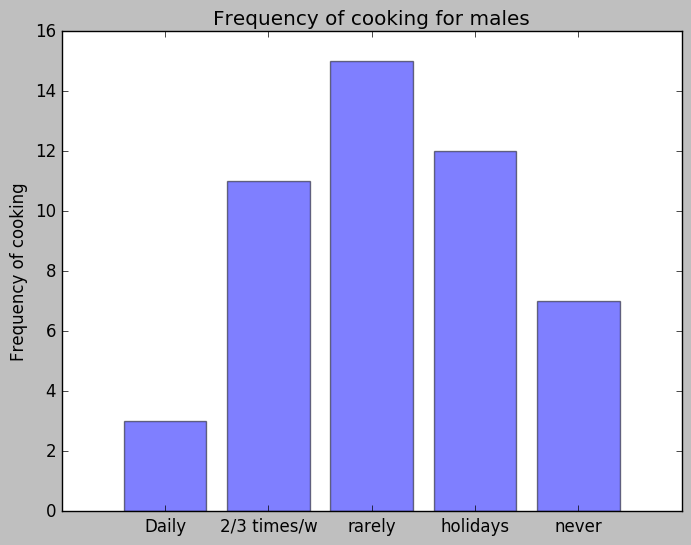

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Daily', '2/3 times/w', 'rarely','holidays', 'never')
y_pos = np.arange(len(objects))
performance = [3,11,15,12,7]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of cooking')
plt.title('Frequency of cooking for males')
 
plt.show()

In [14]:
#let's visualize the distribution of women who cook 
female_cook = females['cook'].value_counts()
print(female_cook)

3.0    34
2.0    23
1.0    10
4.0     6
5.0     1
Name: cook, dtype: int64


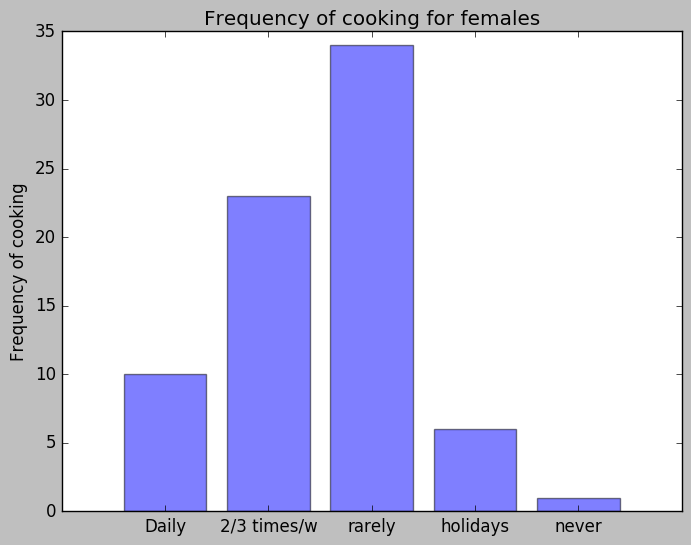

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Daily', '2/3 times/w', 'rarely','holidays', 'never')
y_pos = np.arange(len(objects))
performance = [10,23,34,6,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of cooking')
plt.title('Frequency of cooking for females')
 
plt.show()

Clearly, women are more likely to cook than males. 

In [39]:
# Let's see the correlation between mothers' education and cooking
#will do a spearman here because both variables are categorical
from scipy import stats
from scipy.stats import spearmanr
x = (data['mother_education'])
y = (data['cook'])
spearmanr(x,y)

SpearmanrResult(correlation=0.018525845839277716, pvalue=0.83752368363830632)

Clearly there is no correlation in between these variables

In [40]:
#how about parents' cook and kids' cooking habits?
spearmanr(data['parents_cook'], data['cook'])

SpearmanrResult(correlation=0.24420384332401346, pvalue=0.0060596862206772541)

Yes! if parents dont cook the kids may not cook either and the opposite is also true.  So here the correlation coefficient is .244 and the p value is much smaller than .05


In [41]:
#one more between the cooking habits and living on/off campus
spearmanr(data['cook'], data['on_off_campus'])

SpearmanrResult(correlation=-0.19842943343869354, pvalue=0.026532478372539262)

Yes! If students live on campus they are less likely to cook compared to the ones off campus.  Let's try to visualize these two.

In [43]:
#first dividing the datase into two groups based on living situation
on_campus = data[data['on_off_campus']==1]
off_campus = data[data['on_off_campus']>1]

In [44]:
#values for the ones who live on campus
on_cook = on_campus['cook'].value_counts()
print(on_cook)

3.0    41
2.0    24
4.0    16
1.0     7
5.0     6
Name: cook, dtype: int64


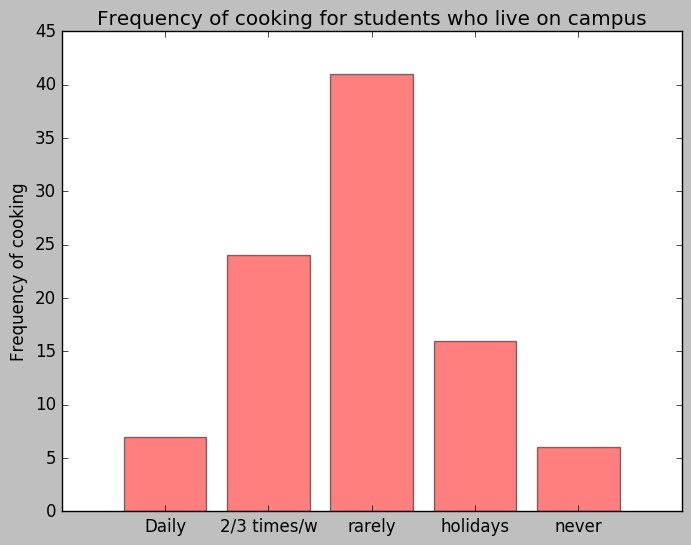

In [45]:
objects = ('Daily', '2/3 times/w', 'rarely','holidays', 'never')
y_pos = np.arange(len(objects))
performance = [7,24,41,16,6]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='red')
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of cooking')
plt.title('Frequency of cooking for students who live on campus')
 
plt.show()

In [46]:
#values for the ones who don't live on campus
off_cook = off_campus['cook'].value_counts()
print(off_cook)

2.0    10
3.0     7
1.0     6
5.0     2
4.0     2
Name: cook, dtype: int64


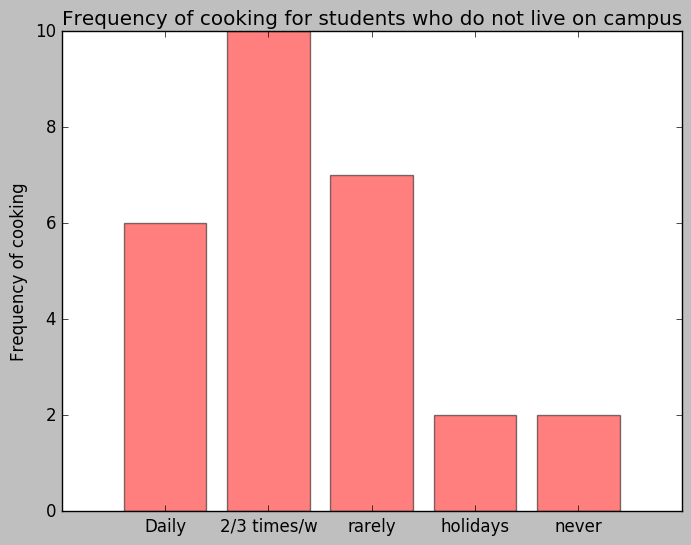

In [47]:
objects = ('Daily', '2/3 times/w', 'rarely','holidays', 'never')
y_pos = np.arange(len(objects))
performance = [6,10,7,2,2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='red')
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of cooking')
plt.title('Frequency of cooking for students who do not live on campus')
 
plt.show()

Even though there are fewer students who do not live on campus they are more likely to cook daily and 2/3 times per week compared to the ones who depend on school cafeteria.

In [48]:
living = data['on_off_campus'].value_counts()
print(living)

1.0    97
2.0    16
3.0     9
4.0     2
Name: on_off_campus, dtype: int64


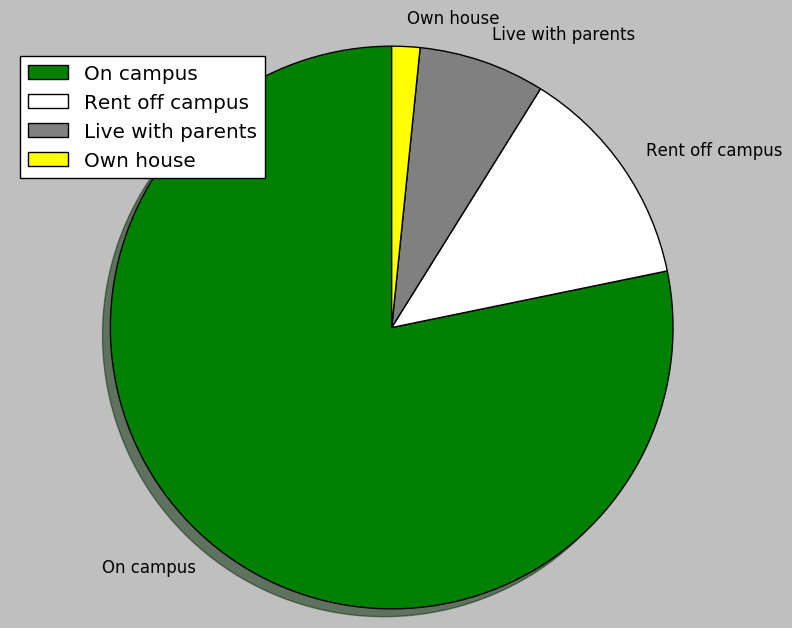

In [53]:
labels = ['On campus', 'Rent off campus', 'Live with parents', 'Own house']
sizes = [97, 16, 9, 2]
colors = ['green', 'white', 'gray', 'yellow']
patches, texts = plt.pie(sizes, labels=labels, colors = colors, shadow = True,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()